<a href="https://colab.research.google.com/github/ashish3127/hourse-and-humna-prediction-Deep-learning/blob/main/Human_0r_hourse_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 import keras 
 from keras.preprocessing.image import ImageDataGenerator
 from keras.layers import Dense
 from keras.optimizers import Adam
 from keras.callbacks import ModelCheckpoint
 import matplotlib.pyplot as plt

Data load


In [ ]:
train_data_path="/content/drive/MyDrive/horse_or_human /train"
validation_data_path="/content/drive/MyDrive/horse_or_human /validation"

data Preprocessing

In [ ]:
training_datagen=ImageDataGenerator(rescale=1./255,
                   rotation_range=40,
                   width_shift_range=0.2,
                   height_shift_range=0.2,
                   shear_range=0.2,
                   zoom_range=0.2,
                   horizontal_flip=True,
                   fill_mode='nearest')

In [ ]:
training_data=training_datagen.flow_from_directory(train_data_path,
                                     target_size=(150, 150),
                                     batch_size=32,
                                     class_mode='binary')

Found 1027 images belonging to 2 classes.


In [ ]:
training_data.class_indices

{'horses': 0, 'humans': 1}

In [ ]:
 valid_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
valid_data= valid_datagen.flow_from_directory(validation_data_path,
                                                 target_size=(150, 150),
                                                 batch_size=32,
                                                 class_mode="binary")

Found 255 images belonging to 2 classes.


In [ ]:
def plotImages(image_arr):
  fig, axes=plt.subplots(1, 5, figsize=(20, 20))
  axes =axes.flatten()
  for img, ax in zip(image_arr, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show  

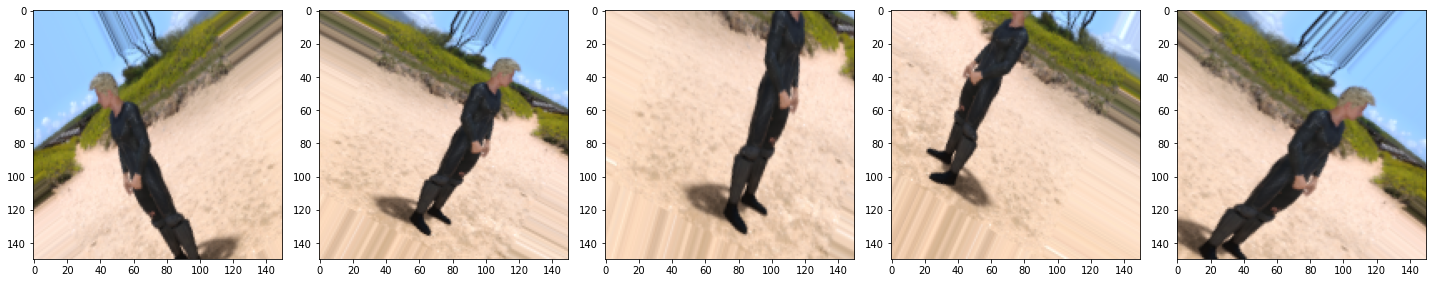

In [ ]:
images =[training_data[0][0][0] for i in range(5)]
plotImages(images)

Build CNN model

In [ ]:
cnn_model = keras.models.Sequential([
                                     keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[150, 150, 3]),
                                     keras.layers.MaxPooling2D(pool_size=(2, 2)),
                                     keras.layers.Conv2D(filters=64, kernel_size=3),
                                     keras.layers.MaxPooling2D(pool_size=(2, 2)),
                                     keras.layers.Conv2D(filters=128, kernel_size=3),
                                     keras.layers.MaxPooling2D(pool_size=(2, 2)),
                                     keras.layers.Conv2D(filters=256, kernel_size=3),
                                     keras.layers.MaxPooling2D(pool_size=(2, 2)),
                                     keras.layers.Dropout(0.5),
                                     keras.layers.Flatten(), # neural network beuilding
                                     keras.layers.Dense(units=128, activation='relu'), # input layers
                                     keras.layers.Dropout(0.1),
                                     keras.layers.Dense(units=256, activation='relu'),
                                     keras.layers.Dropout(0.25),
                                     keras.layers.Dense(units=2, activation='softmax') #output layers
])

# compile cnn model

In [ ]:
cnn_model.compile(optimizer= Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_path='/content/drive/MyDrive/cnn/horse-or-human.h5'
checkpoint=ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

train cnn model

In [ ]:
history = cnn_model.fit(training_data,
                    epochs=50,
                    verbose=1,
                    validation_data= valid_data,
                    callbacks= callbacks_list)

Epoch 1/50
33/33 [==============================] - 600s 18s/step - loss: 0.9005 - accuracy: 0.5306 - val_loss: 0.6125 - val_accuracy: 0.5608

Epoch 00001: val_accuracy improved from -inf to 0.56078, saving model to /content/drive/MyDrive/cnn/horse-or-human.h5
Epoch 2/50
33/33 [==============================] - 12s 351ms/step - loss: 0.6604 - accuracy: 0.6323 - val_loss: 1.6022 - val_accuracy: 0.5569

Epoch 00002: val_accuracy did not improve from 0.56078
Epoch 3/50
33/33 [==============================] - 11s 346ms/step - loss: 0.5700 - accuracy: 0.7108 - val_loss: 1.7032 - val_accuracy: 0.6000

Epoch 00003: val_accuracy improved from 0.56078 to 0.60000, saving model to /content/drive/MyDrive/cnn/horse-or-human.h5
Epoch 4/50
33/33 [==============================] - 12s 350ms/step - loss: 0.4792 - accuracy: 0.7872 - val_loss: 1.7091 - val_accuracy: 0.5882

Epoch 00004: val_accuracy did not improve from 0.60000
Epoch 5/50
33/33 [==============================] - 12s 353ms/step - loss: 0

Summarize history for accuracy

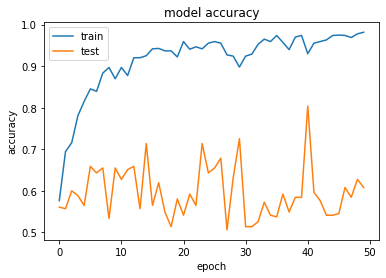

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(["train", "test"], loc='upper left')
plt.show()

summarize history  for loss

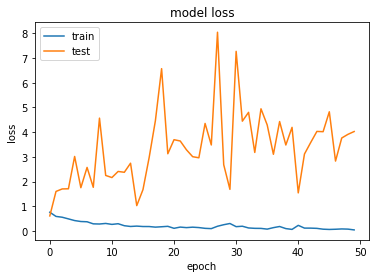

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()